# Storing your data cube in a GaussPy-Friendly Format
To fit your .fit data, you first have to store it in another cube as a .pickle file, which is the type of format GaussPy reads.
The parameters you have to change are: 

FILENAME_DATA = the filename of the .fits cube you want to fit.

FILENAME_DATA_GAUSSPY = the filename you want to use for your resulting .pickle cube.

RMS = estimate of the RMS uncertainty per channel for constructing the error arrays of the data you want to fit.

IMPORTANT: Make sure the cube you want to fit/decompose has no NAN values. The way that .fits files work is by creating an actual cube of data, so if you store data that has a circular shape, the .fits file will assign NAN values to the spaxels that don't have any data to create the cube. When I ran into this problem, the NAN values did not allow me to convert the .fits file into a .pickle file, so I had to make a rectangular/square cut to my circular data.


In [1]:
# Read fits datacube and save in GaussPy format
import numpy as np
import pickle
from astropy.io import fits

# Specify necessary parameters
FILENAME_DATA = 'HOPS164_C18O_small_rectangle_cube.fits'
FILENAME_DATA_GAUSSPY = 'cube.pickle'
RMS = 0.009

hdu_list = fits.open(FILENAME_DATA)
hdu = hdu_list[0]
cube = hdu.data

# initialize
data = {}
errors = np.ones(cube.shape[0]) * RMS
chan = np.arange(cube.shape[0])

# cycle through each spectrum
for i in range(cube.shape[1]):
    for j in range(cube.shape[2]):

        # get the spectrum
        spectrum = cube[:, i, j]

        # get the spectrum location
        location = np.array((i, j))

        # Enter results into GaussPy-friendly dataset
        data['data_list'] = data.get('data_list', []) + [spectrum]
        data['x_values'] = data.get('x_values', []) + [chan]
        data['errors'] = data.get('errors', []) + [errors]
        data['location'] = data.get('location', []) + [location]
        print(f"Spectrum at location {i, j}: {spectrum}")


# Save decomposition information
pickle.dump(data, open(FILENAME_DATA_GAUSSPY, 'wb'))

Spectrum at location (0, 0): [ 8.54290836e-03 -4.04885999e-04 -4.05997038e-04  4.85226978e-03
  2.77847750e-03 -7.72378221e-03  6.44511729e-03  6.02258369e-03
 -1.94706663e-03 -5.12632774e-03 -2.42513046e-03 -1.09459683e-02
  1.49901574e-02  3.25971749e-03 -4.30340506e-03 -2.74073356e-03
 -1.23632988e-02 -4.23857849e-03  3.14414012e-03 -2.70992797e-03
 -8.38003866e-03 -5.36312442e-03  1.32265724e-02  2.25826912e-03
 -1.18997844e-03 -1.87050144e-03  3.56395263e-03 -3.90290841e-03
  3.78115266e-03 -1.78493862e-03 -4.77474881e-03 -6.61943993e-03
 -2.82071810e-03  9.29569174e-03  5.53611608e-04 -7.44404923e-03
  3.55491135e-03 -8.19886191e-05 -3.58905992e-03 -5.58454404e-03
 -2.75171595e-03  1.04171187e-02  3.17548774e-03 -7.34417653e-03
 -4.78784740e-03  8.78456514e-03 -3.38161411e-03  2.02867086e-03
  9.76525061e-03  7.63809029e-03 -6.84519182e-04 -6.19035272e-04
 -2.12494819e-03  1.21550355e-03  1.40825827e-02  1.24964472e-02
  2.69920211e-02  4.21348140e-02  6.07818179e-02  8.88248011e

# Fitting/decomposing the resulting .pickle file.
Before you run this code, make sure you ran the 'github_training_AGD_to_find_best_smoothing_parameters.ipynb' code first to find the best smoothing parameters for your data.

In [2]:
# Decompose multiple Gaussian dataset using AGD with TRAINED alpha
import pickle
import gausspy.gp as gp

# Specify necessary parameters
alpha1 = -1.17
alpha2 = 4.54
snr_thresh = 3.0

FILENAME_DATA_GAUSSPY = 'cube.pickle'
FILENAME_DATA_DECOMP = 'cube_decomposed.pickle'

# Load GaussPy
g = gp.GaussianDecomposer()

# Setting AGD parameters
g.set('phase', 'two')
g.set('SNR_thresh', [snr_thresh, snr_thresh])
g.set('alpha1', alpha1)
g.set('alpha2', alpha2)

# Run GaussPy
decomposed_data = g.batch_decomposition(FILENAME_DATA_GAUSSPY)

# Save decomposition information
pickle.dump(decomposed_data, open(FILENAME_DATA_DECOMP, 'wb'))

using 6 out of 8 cpus
   ---->   0
   ---->     ---->       ---->     ---->  21 
 
3   ---->  4
   ---->  

  0%|          | 0.00/255 [00:00<?, ?it/s]


  65

   ---->  

  0%|          | 1.00/255 [00:01<06:41, 1.58s/it]

 7
   ---->   8
   ---->   9
   ---->   10


  2%|▏         | 5.00/255 [00:01<01:11, 3.48it/s]

   ---->   11


  2%|▏         | 6.00/255 [00:01<01:01, 4.02it/s]

   ---->   12


  3%|▎         | 7.00/255 [00:03<02:04, 1.99it/s]

   ---->      ---->  13 
14


  4%|▎         | 9.00/255 [00:03<01:19, 3.09it/s]

   ---->   15
   ---->   16
   ---->   17


  5%|▍         | 12.0/255 [00:03<00:52, 4.63it/s]

   ---->   18


  5%|▌         | 13.0/255 [00:04<01:24, 2.86it/s]

   ---->   19
   ---->   20


  6%|▌         | 15.0/255 [00:04<01:04, 3.71it/s]

   ---->   21
   ---->   22
   ---->   23
   ---->  

  7%|▋         | 18.0/255 [00:05<00:50, 4.68it/s]

 24
   ---->  

  7%|▋         | 19.0/255 [00:06<01:20, 2.92it/s]

 25
   ---->  

  8%|▊         | 20.0/255 [00:06<01:10, 3.32it/s]

 26


  8%|▊         | 21.0/255 [00:06<01:06, 3.53it/s]

   ---->   27
   ---->   28


  9%|▉         | 23.0/255 [00:06<00:48, 4.74it/s]

   ---->   29


  9%|▉         | 24.0/255 [00:07<00:52, 4.37it/s]

   ---->   30


 10%|▉         | 25.0/255 [00:07<01:20, 2.86it/s]

   ---->   31
   ---->  

 10%|█         | 26.0/255 [00:08<01:19, 2.88it/s]

 32
   ---->   33
   ---->  

 11%|█         | 28.0/255 [00:08<00:52, 4.29it/s]

 34


 11%|█▏        | 29.0/255 [00:08<00:45, 4.92it/s]

   ---->   35
   ---->  

 12%|█▏        | 30.0/255 [00:08<00:50, 4.46it/s]

 36


 12%|█▏        | 31.0/255 [00:09<01:20, 2.80it/s]

   ---->   37


 13%|█▎        | 32.0/255 [00:09<01:14, 3.01it/s]

   ---->   38
   ---->   39


 13%|█▎        | 34.0/255 [00:09<00:46, 4.75it/s]

   ---->   40
   ---->   41
   ---->  

 14%|█▍        | 36.0/255 [00:10<00:41, 5.27it/s]

 42


 15%|█▍        | 37.0/255 [00:10<01:11, 3.04it/s]

   ---->   43
   ---->  

 15%|█▍        | 38.0/255 [00:11<01:07, 3.19it/s]

 44
   ---->   45
   ---->   46


 16%|█▌        | 41.0/255 [00:11<00:39, 5.45it/s]

   ---->   47


 16%|█▋        | 42.0/255 [00:11<00:43, 4.89it/s]

   ---->   48


 17%|█▋        | 43.0/255 [00:12<01:14, 2.85it/s]

   ---->   49
   ---->  

 17%|█▋        | 44.0/255 [00:12<01:05, 3.20it/s]

 50
   ---->   51


 18%|█▊        | 46.0/255 [00:12<00:47, 4.42it/s]

   ---->   52
   ---->   53
   ---->  

 19%|█▉        | 48.0/255 [00:13<00:44, 4.61it/s]

 54


 19%|█▉        | 49.0/255 [00:14<01:10, 2.91it/s]

   ---->   55
   ---->  

 20%|█▉        | 50.0/255 [00:14<01:01, 3.34it/s]

 56


 20%|██        | 51.0/255 [00:14<00:53, 3.80it/s]

   ---->   57
   ---->   58
   ---->   59
   ---->  

 21%|██        | 54.0/255 [00:14<00:40, 5.02it/s]

 60
   ---->  

 22%|██▏       | 55.0/255 [00:15<01:09, 2.88it/s]

 61
   ---->   62


 22%|██▏       | 57.0/255 [00:15<00:48, 4.06it/s]

   ---->   63
   ---->   64


 23%|██▎       | 59.0/255 [00:16<00:39, 4.90it/s]

   ---->   65


 24%|██▎       | 60.0/255 [00:16<00:40, 4.87it/s]

   ---->   66
   ---->  

 24%|██▍       | 61.0/255 [00:17<01:10, 2.77it/s]

 67
   ---->  

 24%|██▍       | 62.0/255 [00:17<01:02, 3.11it/s]

 68


 25%|██▍       | 63.0/255 [00:17<00:52, 3.65it/s]

   ---->   69
   ---->   70
   ---->  

 25%|██▌       | 65.0/255 [00:17<00:40, 4.70it/s]

 71
   ---->  

 26%|██▌       | 66.0/255 [00:18<00:46, 4.07it/s]

 72


 26%|██▋       | 67.0/255 [00:19<01:11, 2.63it/s]

   ---->   73


 27%|██▋       | 68.0/255 [00:19<00:58, 3.22it/s]

   ---->   74


 27%|██▋       | 69.0/255 [00:19<00:50, 3.66it/s]

   ---->   75   ---->  
 76


 28%|██▊       | 71.0/255 [00:19<00:32, 5.58it/s]

   ---->   77


 28%|██▊       | 72.0/255 [00:19<00:37, 4.88it/s]

   ---->   78


 29%|██▊       | 73.0/255 [00:20<01:01, 2.95it/s]

   ---->   79
   ---->  

 29%|██▉       | 74.0/255 [00:20<00:56, 3.20it/s]

 80
   ---->  

 29%|██▉       | 75.0/255 [00:20<00:49, 3.67it/s]

 81


 30%|██▉       | 76.0/255 [00:21<00:43, 4.16it/s]

   ---->   82


 30%|███       | 77.0/255 [00:21<00:39, 4.46it/s]

   ---->   83
   ---->   84


 31%|███       | 79.0/255 [00:22<00:58, 3.02it/s]

   ---->   85
   ---->  

 31%|███▏      | 80.0/255 [00:22<00:56, 3.09it/s]

 86
   ---->  

 32%|███▏      | 81.0/255 [00:22<00:48, 3.60it/s]

 87
   ---->   88


 33%|███▎      | 83.0/255 [00:22<00:33, 5.15it/s]

   ---->   89
   ---->   90


 33%|███▎      | 85.0/255 [00:23<00:49, 3.43it/s]

   ---->   91


 34%|███▎      | 86.0/255 [00:24<00:53, 3.16it/s]

   ---->   92
   ---->   93
   ---->  

 35%|███▍      | 88.0/255 [00:24<00:37, 4.49it/s]

 94
   ---->   95


 35%|███▌      | 90.0/255 [00:24<00:32, 5.14it/s]

   ---->   96


 36%|███▌      | 91.0/255 [00:25<00:53, 3.05it/s]

   ---->   97


 36%|███▌      | 92.0/255 [00:25<00:52, 3.13it/s]

   ---->   98
   ---->  

 36%|███▋      | 93.0/255 [00:25<00:51, 3.13it/s]

 99
   ---->  

 37%|███▋      | 94.0/255 [00:26<00:44, 3.58it/s]

 100
   ---->   101
   ---->   102
   ---->  

 38%|███▊      | 97.0/255 [00:26<00:39, 3.95it/s]

 103
   ---->  

 38%|███▊      | 98.0/255 [00:27<00:48, 3.21it/s]

 104
   ---->  

 39%|███▉      | 99.0/255 [00:27<00:47, 3.30it/s]

 105
   ---->   106


 40%|███▉      | 101/255 [00:27<00:33, 4.59it/s] 

   ---->   107
   ---->   108
   ---->  

 40%|████      | 103/255 [00:28<00:39, 3.87it/s]

 109


 41%|████      | 104/255 [00:29<00:51, 2.93it/s]

   ---->   110
   ---->   111
   ---->  

 42%|████▏     | 106/255 [00:29<00:39, 3.73it/s]

 112
   ---->  

 42%|████▏     | 107/255 [00:29<00:35, 4.15it/s]

 113
   ---->   114


 43%|████▎     | 109/255 [00:30<00:48, 3.03it/s]

   ---->   115
   ---->  

 43%|████▎     | 110/255 [00:30<00:51, 2.81it/s]

 116
   ---->   117


 44%|████▍     | 112/255 [00:31<00:35, 3.99it/s]

   ---->   118
   ---->   119
   ---->  

 45%|████▍     | 114/255 [00:31<00:26, 5.36it/s]

 120


 45%|████▌     | 115/255 [00:32<00:46, 3.04it/s]

   ---->   121


 45%|████▌     | 116/255 [00:32<00:48, 2.84it/s]

   ---->   122
   ---->   123
   ---->  

 46%|████▋     | 118/255 [00:32<00:32, 4.15it/s]

 124
   ---->   125


 47%|████▋     | 120/255 [00:32<00:23, 5.72it/s]

   ---->   126
   ---->   127


 48%|████▊     | 122/255 [00:34<00:50, 2.65it/s]

   ---->   128


 48%|████▊     | 123/255 [00:34<00:43, 3.03it/s]

   ---->   129
   ---->  

 49%|████▊     | 124/255 [00:34<00:41, 3.16it/s]

 130
   ---->   131
   ---->  

 49%|████▉     | 126/255 [00:35<00:32, 3.91it/s]

 132
   ---->  

 50%|████▉     | 127/255 [00:35<00:50, 2.54it/s]

 133
   ---->   134
   ---->  

 51%|█████     | 129/255 [00:36<00:34, 3.62it/s]

 135
   ---->  

 51%|█████     | 130/255 [00:36<00:33, 3.76it/s]

 136


 51%|█████▏    | 131/255 [00:36<00:28, 4.37it/s]

   ---->   137


 52%|█████▏    | 132/255 [00:36<00:25, 4.73it/s]

   ---->   138


 52%|█████▏    | 133/255 [00:37<00:45, 2.66it/s]

   ---->   139
   ---->   140


 53%|█████▎    | 135/255 [00:37<00:31, 3.84it/s]

   ---->   141


 53%|█████▎    | 136/255 [00:38<00:36, 3.23it/s]

   ---->   142


 54%|█████▎    | 137/255 [00:38<00:31, 3.78it/s]

   ---->   143


 54%|█████▍    | 138/255 [00:38<00:26, 4.42it/s]

   ---->   144


 55%|█████▍    | 139/255 [00:39<00:41, 2.80it/s]

   ---->   145


 55%|█████▍    | 140/255 [00:39<00:36, 3.11it/s]

   ---->   146


 55%|█████▌    | 141/255 [00:39<00:33, 3.40it/s]

   ---->   147


 56%|█████▌    | 142/255 [00:39<00:36, 3.13it/s]

   ---->   148
   ---->   149
   ---->   150
   ---->  

 57%|█████▋    | 145/255 [00:40<00:30, 3.59it/s]

 151
   ---->  

 57%|█████▋    | 146/255 [00:40<00:27, 3.94it/s]

 152
   ---->  

 58%|█████▊    | 147/255 [00:41<00:27, 3.96it/s]

 153


 58%|█████▊    | 148/255 [00:41<00:30, 3.48it/s]

   ---->   154
   ---->   155
   ---->  

 59%|█████▉    | 150/255 [00:41<00:20, 5.03it/s]

 156
   ---->  

 59%|█████▉    | 151/255 [00:42<00:28, 3.67it/s]

 157


 60%|█████▉    | 152/255 [00:42<00:29, 3.53it/s]

   ---->   158
   ---->  

 60%|██████    | 153/255 [00:43<00:36, 2.81it/s]

 159
   ---->   160


 61%|██████    | 155/255 [00:43<00:25, 3.94it/s]

   ---->   161
   ---->  

 61%|██████    | 156/255 [00:43<00:21, 4.52it/s]

 162


 62%|██████▏   | 157/255 [00:43<00:27, 3.61it/s]

   ---->   163
   ---->   164


 62%|██████▏   | 159/255 [00:44<00:35, 2.73it/s]

   ---->   165
   ---->   166
   ---->   167


 64%|██████▎   | 162/255 [00:45<00:21, 4.31it/s]

   ---->   168


 64%|██████▍   | 163/255 [00:45<00:24, 3.82it/s]

   ---->   169
   ---->   170


 65%|██████▍   | 165/255 [00:46<00:29, 3.08it/s]

   ---->   171
   ---->   172
   ---->  

 65%|██████▌   | 167/255 [00:46<00:23, 3.82it/s]

 173
   ---->  

 66%|██████▌   | 168/255 [00:46<00:22, 3.81it/s]

 174


 66%|██████▋   | 169/255 [00:47<00:25, 3.34it/s]

   ---->   175
   ---->  

 67%|██████▋   | 170/255 [00:47<00:21, 3.91it/s]

 176


 67%|██████▋   | 171/255 [00:47<00:27, 3.03it/s]

   ---->   177
   ---->   178
   ---->  

 68%|██████▊   | 173/255 [00:48<00:19, 4.29it/s]

 179


 68%|██████▊   | 174/255 [00:48<00:20, 3.99it/s]

   ---->   180
   ---->  

 69%|██████▊   | 175/255 [00:48<00:23, 3.36it/s]

 181


 69%|██████▉   | 176/255 [00:49<00:20, 3.81it/s]

   ---->   182


 69%|██████▉   | 177/255 [00:49<00:23, 3.36it/s]

   ---->   183
   ---->   184


 70%|███████   | 179/255 [00:49<00:19, 4.00it/s]

   ---->   185


 71%|███████   | 180/255 [00:50<00:18, 4.01it/s]

   ---->   186


 71%|███████   | 181/255 [00:50<00:20, 3.53it/s]

   ---->   187
   ---->  

 71%|███████▏  | 182/255 [00:50<00:20, 3.55it/s]

 188


 72%|███████▏  | 183/255 [00:51<00:23, 3.13it/s]

   ---->   189


 72%|███████▏  | 184/255 [00:51<00:20, 3.50it/s]

   ---->   190


 73%|███████▎  | 185/255 [00:51<00:20, 3.45it/s]

   ---->   191


 73%|███████▎  | 186/255 [00:51<00:18, 3.68it/s]

   ---->   192


 73%|███████▎  | 187/255 [00:52<00:19, 3.50it/s]

   ---->   193
   ---->   194
   ---->  

 74%|███████▍  | 189/255 [00:52<00:18, 3.54it/s]

 195


 75%|███████▍  | 190/255 [00:53<00:20, 3.15it/s]

   ---->   196


 75%|███████▍  | 191/255 [00:53<00:19, 3.24it/s]

   ---->   197
   ---->   198


 76%|███████▌  | 193/255 [00:53<00:14, 4.19it/s]

   ---->   199
   ---->   200


 76%|███████▋  | 195/255 [00:54<00:15, 3.99it/s]

   ---->   201


 77%|███████▋  | 196/255 [00:54<00:16, 3.52it/s]

   ---->   202


 77%|███████▋  | 197/255 [00:55<00:19, 2.98it/s]

   ---->   203
   ---->   204


 78%|███████▊  | 199/255 [00:55<00:12, 4.45it/s]

   ---->   205
   ---->  

 78%|███████▊  | 200/255 [00:55<00:12, 4.53it/s]

 206


 79%|███████▉  | 201/255 [00:56<00:16, 3.35it/s]

   ---->   207


 79%|███████▉  | 202/255 [00:56<00:17, 3.04it/s]

   ---->   208


 80%|███████▉  | 203/255 [00:56<00:15, 3.28it/s]

   ---->   209
   ---->  

 80%|████████  | 204/255 [00:56<00:13, 3.89it/s]

 210
   ---->   211
   ---->  

 81%|████████  | 206/255 [00:57<00:10, 4.89it/s]

 212
   ---->  

 81%|████████  | 207/255 [00:57<00:13, 3.46it/s]

 213


 82%|████████▏ | 208/255 [00:58<00:14, 3.31it/s]

   ---->   214


 82%|████████▏ | 209/255 [00:58<00:14, 3.20it/s]

   ---->   215


 82%|████████▏ | 210/255 [00:58<00:11, 3.76it/s]

   ---->   216
   ---->   217


 83%|████████▎ | 212/255 [00:59<00:10, 4.01it/s]

   ---->   218


 84%|████████▎ | 213/255 [00:59<00:11, 3.52it/s]

   ---->   219


 84%|████████▍ | 214/255 [00:59<00:13, 3.13it/s]

   ---->   220
   ---->  

 84%|████████▍ | 215/255 [01:00<00:15, 2.62it/s]

 221
   ---->   222
   ---->   223


 85%|████████▌ | 218/255 [01:00<00:09, 3.81it/s]

   ---->   224


 86%|████████▌ | 219/255 [01:01<00:08, 4.11it/s]

   ---->   225


 86%|████████▋ | 220/255 [01:01<00:09, 3.75it/s]

   ---->   226


 87%|████████▋ | 221/255 [01:02<00:12, 2.76it/s]

   ---->   227
   ---->   228


 87%|████████▋ | 223/255 [01:02<00:07, 4.12it/s]

   ---->   229
   ---->  

 88%|████████▊ | 224/255 [01:02<00:08, 3.76it/s]

 230


 88%|████████▊ | 225/255 [01:02<00:06, 4.32it/s]

   ---->   231
   ---->  

 89%|████████▊ | 226/255 [01:03<00:07, 3.63it/s]

 232
   ---->  

 89%|████████▉ | 227/255 [01:03<00:09, 2.91it/s]

 233
   ---->   234
   ---->  

 90%|████████▉ | 229/255 [01:03<00:06, 4.11it/s]

 235


 90%|█████████ | 230/255 [01:04<00:07, 3.33it/s]

   ---->   236
   ---->  

 91%|█████████ | 231/255 [01:04<00:07, 3.22it/s]

 237


 91%|█████████ | 232/255 [01:04<00:06, 3.47it/s]

   ---->   238


 91%|█████████▏| 233/255 [01:05<00:08, 2.67it/s]

   ---->   239
   ---->   240


 92%|█████████▏| 235/255 [01:05<00:04, 4.25it/s]

   ---->   241


 93%|█████████▎| 236/255 [01:05<00:04, 3.83it/s]

   ---->   242


 93%|█████████▎| 237/255 [01:06<00:05, 3.40it/s]

   ---->   243


 93%|█████████▎| 238/255 [01:06<00:04, 3.68it/s]

   ---->   244


 94%|█████████▎| 239/255 [01:07<00:06, 2.53it/s]

   ---->   245
   ---->   246


 95%|█████████▍| 241/255 [01:07<00:03, 4.09it/s]

   ---->   247


 95%|█████████▍| 242/255 [01:07<00:03, 3.68it/s]

   ---->   248


 95%|█████████▌| 243/255 [01:08<00:03, 3.12it/s]

   ---->   249
   ---->  

 96%|█████████▌| 244/255 [01:08<00:02, 3.78it/s]

 250


 96%|█████████▌| 245/255 [01:09<00:03, 2.54it/s]

   ---->   251


 96%|█████████▋| 246/255 [01:09<00:02, 3.02it/s]

   ---->   252
   ---->   253
   ---->  

 97%|█████████▋| 248/255 [01:09<00:01, 3.65it/s]

 254


 98%|█████████▊| 249/255 [01:10<00:01, 3.09it/s]

   ---->   255


100%|██████████| 255/255 [01:11<00:00, 3.58it/s]
255it [00:00, 938199.58it/s]

SUCCESS
100 finished.%


# Plotting 
After your data has been fitted/decomposed, you can go ahead and plot it. Keep in mind that these plots are random, if you want to plot a specific spaxel, you should run the code after this one.

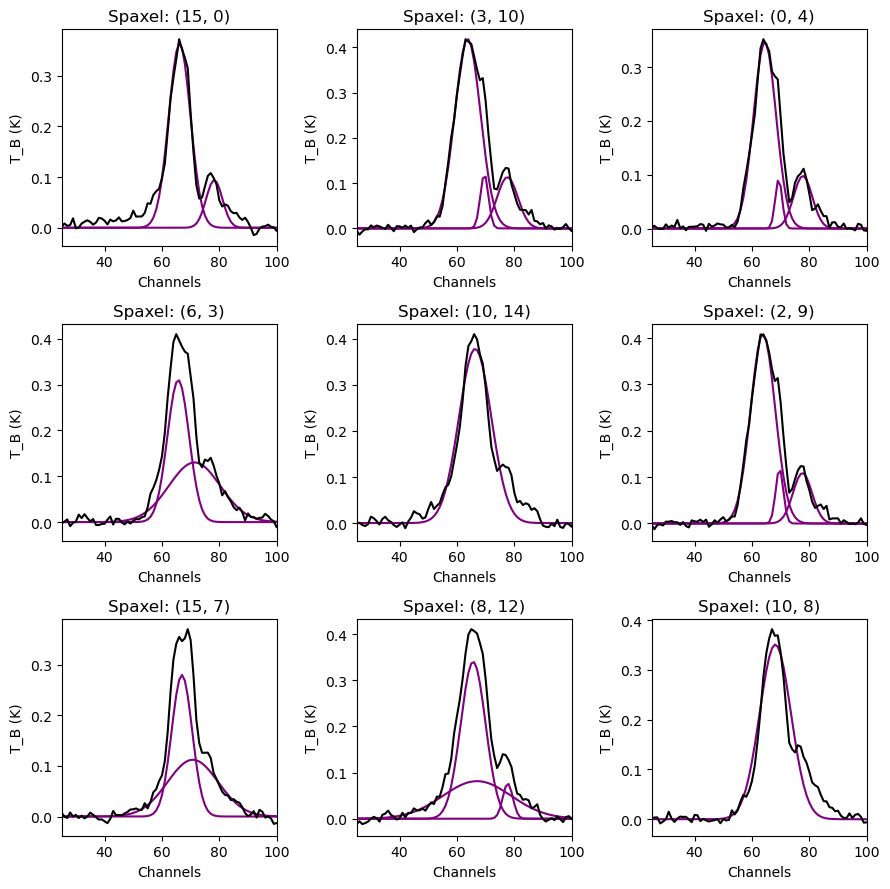

In [1]:
# Plot GaussPy results for selections of cube LOS
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the original data
FILENAME_DATA_GAUSSPY = 'cube.pickle'
with open(FILENAME_DATA_GAUSSPY, 'rb') as file:
    data = pickle.load(file)

# Load decomposed data
FILENAME_DATA_DECOMP = 'cube_decomposed.pickle'
with open(FILENAME_DATA_DECOMP, 'rb') as file:
    data_decomposed = pickle.load(file)

# Ensure that index_values doesn't exceed the length of the data
num_spectra = len(data['x_values'])  # Get the number of spectra in the data
nx, ny = 15, 15  # Your cube's spatial dimensions; adjust based on your actual data.
index_values = np.random.choice(num_spectra, size=9, replace=False)  # Random unique indices

# Plot random results
fig = plt.figure(0, [9, 9])

for i in range(1, 10):
    ax = fig.add_subplot(3, 3, i)

    index = index_values[i - 1]
    x = data['x_values'][index]
    y = data['data_list'][index]

    fit_fwhms = data_decomposed['fwhms_fit'][index]
    fit_means = data_decomposed['means_fit'][index]
    fit_amps = data_decomposed['amplitudes_fit'][index]

    # Plot individual components
    if len(fit_amps) > 0:
        for j in range(len(fit_amps)):
            amp, fwhm, mean = fit_amps[j], fit_fwhms[j], fit_means[j]
            yy = amp * np.exp(-4. * np.log(2) * (x - mean) ** 2 / fwhm ** 2)
            ax.plot(x, yy, '-', lw=1.5, color='purple')

    ax.plot(x, y, color='black')
    ax.set_xlim(25, 100)
    ax.set_xlabel('Channels')
    ax.set_ylabel('T_B (K)')

    # Compute spatial (x, y) values for the selected index
    x_spatial = index // ny
    y_spatial = index % ny

    # Set title with spatial (x, y) coordinates
    ax.set_title(f"Spaxel: ({x_spatial}, {y_spatial})")

plt.tight_layout()
plt.show()

Plotting specific spaxels:

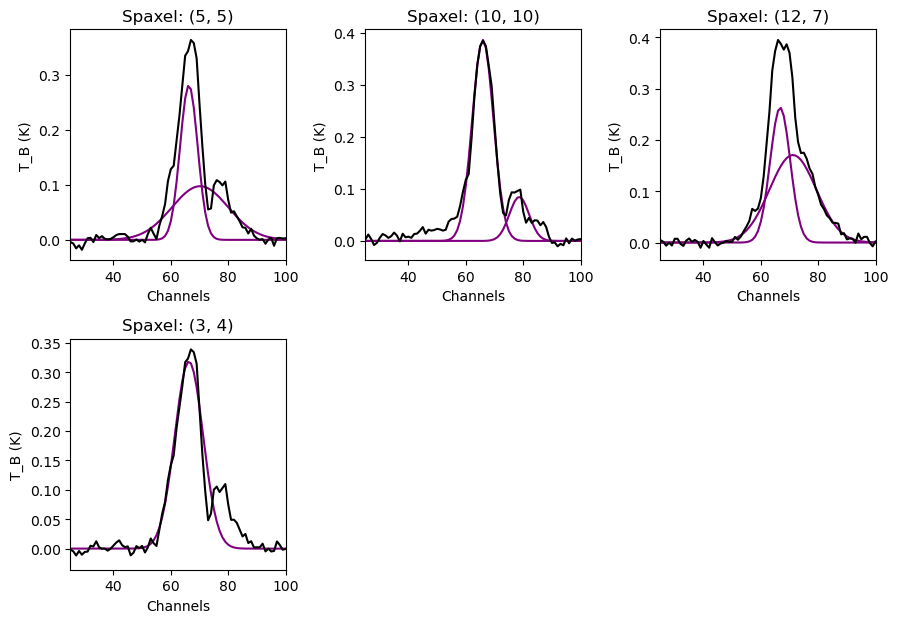

In [2]:
# Plot GaussPy results for selected cube LOS
import numpy as np
import pickle
import matplotlib.pyplot as plt

# Load the original data
FILENAME_DATA_GAUSSPY = 'cube.pickle'
with open(FILENAME_DATA_GAUSSPY, 'rb') as file:
    data = pickle.load(file)

# Load decomposed data
FILENAME_DATA_DECOMP = 'cube_decomposed.pickle'
with open(FILENAME_DATA_DECOMP, 'rb') as file:
    data_decomposed = pickle.load(file)

# Specify cube dimensions
nx, ny = 15, 15  # Adjust these dimensions to match your cube's dimensions!

# Input the spaxels you want to plot as (x, y) coordinates
spaxels_to_plot = [(5, 5), (10, 10), (12, 7), (3, 4)]  # Add more (x, y) pairs here!

# Convert (x, y) to spaxel indices
selected_indices = [x * ny + y for x, y in spaxels_to_plot]

# Ensure that indices are valid
num_spectra = len(data['x_values'])  # Get the number of spectra in the data
selected_indices = [index for index in selected_indices if index < num_spectra]

# Plot selected spaxels
fig = plt.figure(figsize=(9, 9))

for i, index in enumerate(selected_indices, start=1):
    ax = fig.add_subplot(3, 3, i)

    x = data['x_values'][index]
    y = data['data_list'][index]

    fit_fwhms = data_decomposed['fwhms_fit'][index]
    fit_means = data_decomposed['means_fit'][index]
    fit_amps = data_decomposed['amplitudes_fit'][index]

    # Plot individual components
    if len(fit_amps) > 0:
        for j in range(len(fit_amps)):
            amp, fwhm, mean = fit_amps[j], fit_fwhms[j], fit_means[j]
            yy = amp * np.exp(-4. * np.log(2) * (x - mean) ** 2 / fwhm ** 2)
            ax.plot(x, yy, '-', lw=1.5, color='purple')

    ax.plot(x, y, color='black')
    ax.set_xlim(25, 100)
    ax.set_xlabel('Channels')
    ax.set_ylabel('T_B (K)')

    # Compute (x, y) from index for the title
    x_spatial = index // ny
    y_spatial = index % ny
    ax.set_title(f"Spaxel: ({x_spatial}, {y_spatial})")

plt.tight_layout()
plt.show()